## Q1. Implement a KNN model to classify the animals in to categorie

In [1]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the file and data
data = pd.read_csv('Zoo.csv')
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
# Understanding the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal name    101 non-null object
hair           101 non-null int64
feathers       101 non-null int64
eggs           101 non-null int64
milk           101 non-null int64
airborne       101 non-null int64
aquatic        101 non-null int64
predator       101 non-null int64
toothed        101 non-null int64
backbone       101 non-null int64
breathes       101 non-null int64
venomous       101 non-null int64
fins           101 non-null int64
legs           101 non-null int64
tail           101 non-null int64
domestic       101 non-null int64
catsize        101 non-null int64
type           101 non-null int64
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [4]:
# Analysing the final required output types
data['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [5]:
#Splitting the data as input(x) and output(y)
x = data.drop(['animal name','type'],axis = 1)
y = data['type']

In [6]:
# Splitting the data set into train and test_size data sets
x_train,x_test,y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 100)

## Grid search CV method(Finding the optimal K-value)

In [7]:
# Using grid search CV method to find the right k value
KNN = KNeighborsClassifier()
k_range = (1,21)
param_grid = dict(n_neighbors = k_range)
#Defining parameter range and fitting the grid seach cv algorithm
grid= GridSearchCV(KNN,param_grid,cv=2,scoring='accuracy',return_train_score= False, verbose= 1)
grid_search = grid.fit(x_train,y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [8]:
# Best k Value
grid_search.best_params_

{'n_neighbors': 1}

In [9]:
#Best score by grid search CV when k=1
grid_search.best_score_

0.975

In [10]:
# Accuracy of training model
accuracy= grid_search.best_score_*100
accuracy

97.5

### Visualizing the CV results

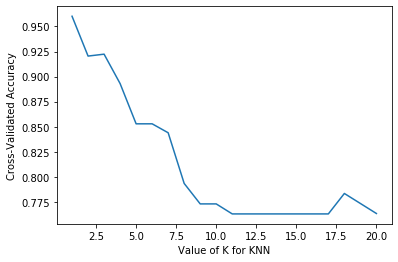

In [11]:
# choose k between 1 to 2
k_range = range(1, 21)
k_scores = []
# use iteration to caclulate different K's in model, then return the average accuracy based on the cross validation
for k in k_range:
    KNN = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(KNN, x, y, cv=4)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### Predictions using the test data set

In [12]:
# Create a final model and predict
KNN_Final = KNeighborsClassifier(n_neighbors=1)
KNN_Final.fit(x,y)
y_test_hat = KNN_Final.predict(x_test)
y_test_hat

array([2, 4, 5, 1, 1, 5, 1, 2, 2, 2, 1, 6, 1, 3, 6, 1, 4, 1, 2, 2, 1],
      dtype=int64)

In [13]:
#Actual y- test values
pd.array(y_test)

<PandasArray>
[2, 4, 5, 1, 1, 5, 1, 2, 2, 2, 1, 6, 1, 3, 6, 1, 4, 1, 2, 2, 1]
Length: 21, dtype: int64

In [14]:
#Finding the accuracy of predictions by comparing the actual and predicted values
test_accuracy = accuracy_score(y_test,y_test_hat)*100
test_accuracy

100.0

## Conclusion:

#### Based on the above observations, our final model is able to predict the type of animal in the zoo accurately by using the given features of animals.